In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline # plot in cell
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats

import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [188]:
import pandas as pd

walk_fw = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\walkForward.xlsx')
walk_bw = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\walkBackward.xlsx')
jog_run = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\jog&run.xlsx')
squat_down = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\squatDown.xlsx')

bending = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\bend.xlsx')
bend_pickup = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\bendPickup.xlsx')
limp = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\limp.xlsx')
stumble = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\stumble.xlsx')

trip_over = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\tripOver.xlsx')
cough_sneeze = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\cough&sneeze.xlsx')
sit_chair = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\sitChair.xlsx')
sit_sofa = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\sitSofa.xlsx')

sit_air = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\sitAir.xlsx')
sit_bed = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\sitBed.xlsx')
lying_bed = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\lyingBed.xlsx')
rising_bed = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\new_16ADLs\Excel file\risingBed.xlsx')

#Manually adjusted data 

walk_fw = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\walkForward.xlsx')
walk_bw = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\walkBackward.xlsx')
jog_run = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\jog&run.xlsx')
squat_down = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\squatDown.xlsx')

bending = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\bend.xlsx')
bend_pickup = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\bendPickup.xlsx')
limp = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\limp.xlsx')
stumble = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\stumble.xlsx')

trip_over = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\tripOver.xlsx')
cough_sneeze = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\cough&sneeze.xlsx')
sit_chair = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\sitChair.xlsx')
sit_sofa = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\sitSofa.xlsx')

sit_air = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\sitAir.xlsx')
sit_bed = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\sitBed.xlsx')
lying_bed = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\lyingBed.xlsx')
rising_bed = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\16ADLs ManuallyAdjustedData\16ADLs excel\risingBed.xlsx')

In [220]:
print(len(walk_fw))
print(len(walk_bw))
print(len(jog_run))
print(len(squat_down))

print(len(bending))
print(len(bend_pickup))
print(len(limp))
print(len(stumble))

print(len(trip_over))
print(len(cough_sneeze))
print(len(sit_chair))
print(len(sit_sofa))

print(len(sit_air))
print(len(sit_bed))
print(len(lying_bed))
print(len(rising_bed))

44078
51757
40782
33099
29728
30843
49831
42977
42438
35312
31263
32528
29490
31663
35102
37767


In [214]:
# Split dataset to 2 parts: Train (60%) - Test (40%)
# Fs = 25 Hz
# window_size = 15s - 25Hz => 375 samples/frame

frame = 475
stride = 475 
ratio = 0.6

walk_fw_train = [walk_fw[i:i+frame] for i in range(0, int(len(walk_fw)*ratio), stride)] 
walk_fw_test = [walk_fw[i:i+frame] for i in range(int(len(walk_fw)*ratio), len(walk_fw), stride)
                                                    if i+frame<=len(walk_fw)]

walk_bw_train = [walk_bw[i:i+frame] for i in range(0, int(len(walk_bw)*ratio), stride)] 
walk_bw_test = [walk_bw[i:i+frame] for i in range(int(len(walk_bw)*ratio), len(walk_bw), stride) 
                                            if i+frame<=len(walk_bw)]

jog_run_train = [jog_run[i:i+frame] for i in range(0, int(len(jog_run)*ratio), stride)] 
jog_run_test = [jog_run[i:i+frame] for i in range(int(len(jog_run)*ratio), len(jog_run), stride) 
                                            if i+frame<=len(jog_run)]

squat_down_train = [squat_down[i:i+frame] for i in range(0, int(len(squat_down)*ratio), stride)] 
squat_down_test = [squat_down[i:i+frame] for i in range(int(len(squat_down)*ratio), len(squat_down), stride) 
                                            if i+frame<=len(squat_down)]

bending_train = [bending[i:i+frame] for i in range(0, int(len(bending)*ratio), stride)] 
bending_test = [bending[i:i+frame] for i in range(int(len(bending)*ratio), len(bending), stride) 
                                            if i+frame<=len(bending)]

bend_pickup_train = [bend_pickup[i:i+frame] for i in range(0, int(len(bend_pickup)*ratio), stride)] 
bend_pickup_test = [bend_pickup[i:i+frame] for i in range(int(len(bend_pickup)*ratio), len(bend_pickup), stride) 
                                            if i+frame<=len(bend_pickup)]

limp_train = [limp[i:i+frame] for i in range(0, int(len(limp)*ratio), stride)] 
limp_test = [limp[i:i+frame] for i in range(int(len(limp)*ratio), len(limp), stride) 
                                            if i+frame<=len(limp)]

stumble_train = [stumble[i:i+frame] for i in range(0, int(len(stumble)*ratio), stride)] 
stumble_test = [stumble[i:i+frame] for i in range(int(len(stumble)*ratio), len(stumble), stride) 
                                            if i+frame<=len(stumble)]

trip_over_train = [trip_over[i:i+frame] for i in range(0, int(len(trip_over)*ratio), stride)] 
trip_over_test = [trip_over[i:i+frame] for i in range(int(len(trip_over)*ratio), len(trip_over), stride) 
                                            if i+frame<=len(trip_over)]

cough_sneeze_train = [cough_sneeze[i:i+frame] for i in range(0, int(len(cough_sneeze)*ratio), stride)] 
cough_sneeze_test = [cough_sneeze[i:i+frame] for i in range(int(len(cough_sneeze)*ratio), len(cough_sneeze), stride) 
                                            if i+frame<=len(cough_sneeze)]

sit_chair_train = [sit_chair[i:i+frame] for i in range(0, int(len(sit_chair)*ratio), stride)] 
sit_chair_test = [sit_chair[i:i+frame] for i in range(int(len(sit_chair)*ratio), len(sit_chair), stride) 
                                            if i+frame<=len(sit_chair)]

sit_sofa_train = [sit_sofa[i:i+frame] for i in range(0, int(len(sit_sofa)*ratio), stride)] 
sit_sofa_test = [sit_sofa[i:i+frame] for i in range(int(len(sit_sofa)*ratio), len(sit_sofa), stride) 
                                            if i+frame<=len(sit_sofa)]

sit_air_train = [sit_air[i:i+frame] for i in range(0, int(len(sit_air)*ratio), stride)] 
sit_air_test = [sit_air[i:i+frame] for i in range(int(len(sit_air)*ratio), len(sit_air), stride) 
                                            if i+frame<=len(sit_air)]

sit_bed_train = [sit_bed[i:i+frame] for i in range(0, int(len(sit_bed)*ratio), stride)] 
sit_bed_test = [sit_bed[i:i+frame] for i in range(int(len(sit_bed)*ratio), len(sit_bed), stride) 
                                            if i+frame<=len(sit_bed)]

lying_bed_train = [lying_bed[i:i+frame] for i in range(0, int(len(lying_bed)*ratio), stride)] 
lying_bed_test = [lying_bed[i:i+frame] for i in range(int(len(lying_bed)*ratio), len(lying_bed), stride) 
                                            if i+frame<=len(lying_bed)]

rising_bed_train = [rising_bed[i:i+frame] for i in range(0, int(len(rising_bed)*ratio), stride)] 
rising_bed_test = [rising_bed[i:i+frame] for i in range(int(len(rising_bed)*ratio), len(rising_bed), stride) 
                                            if i+frame<=len(rising_bed)]

In [215]:
train_data = []
train_label = []

test_data = []
test_label = []

for acts in walk_fw_train:
    train_data.append(acts)
    train_label.append(0)
    
for acts in walk_bw_train:
    train_data.append(acts)
    train_label.append(1)
    
for acts in jog_run_train:
    train_data.append(acts)
    train_label.append(2)

for acts in squat_down_train:
    train_data.append(acts)
    train_label.append(3)
    
for acts in bending_train:
    train_data.append(acts)
    train_label.append(4)
    
for acts in bend_pickup_train:
    train_data.append(acts)
    train_label.append(5)
    
for acts in limp_train:
    train_data.append(acts)
    train_label.append(6)
    
for acts in stumble_train:
    train_data.append(acts)
    train_label.append(7)
    
for acts in trip_over_train:
    train_data.append(acts)
    train_label.append(8)
    
for acts in cough_sneeze_train:
    train_data.append(acts)
    train_label.append(9)
    
for acts in sit_chair_train:
    train_data.append(acts)
    train_label.append(10)
    
for acts in sit_sofa_train:
    train_data.append(acts)
    train_label.append(11)
    
for acts in sit_air_train:
    train_data.append(acts)
    train_label.append(12)
    
for acts in sit_bed_train:
    train_data.append(acts)
    train_label.append(13)
    
for acts in lying_bed_train:
    train_data.append(acts)
    train_label.append(14)
    
for acts in rising_bed_train:
    train_data.append(acts)
    train_label.append(15)

print('train-data length: ', len(train_data))
print('train-label length: ', len(train_label))
#print(train_label)
      
# For TEST

for acts in walk_fw_test:
    test_data.append(acts)
    test_label.append(0)
    
for acts in walk_bw_test:
    test_data.append(acts)
    test_label.append(1)
    
for acts in jog_run_test:
    test_data.append(acts)
    test_label.append(2)

for acts in squat_down_test:
    test_data.append(acts)
    test_label.append(3)
    
for acts in bending_test:
    test_data.append(acts)
    test_label.append(4)
    
for acts in bend_pickup_test:
    test_data.append(acts)
    test_label.append(5)
    
for acts in limp_test:
    test_data.append(acts)
    test_label.append(6)
    
for acts in stumble_test:
    test_data.append(acts)
    test_label.append(7)
    
for acts in trip_over_test:
    test_data.append(acts)
    test_label.append(8)
    
for acts in cough_sneeze_test:
    test_data.append(acts)
    test_label.append(9)
    
for acts in sit_chair_test:
    test_data.append(acts)
    test_label.append(10)
    
for acts in sit_sofa_test:
    test_data.append(acts)
    test_label.append(11)
    
for acts in sit_air_test:
    test_data.append(acts)
    test_label.append(12)
    
for acts in sit_bed_test:
    test_data.append(acts)
    test_label.append(13)
    
for acts in lying_bed_test:
    test_data.append(acts)
    test_label.append(14)
    
for acts in rising_bed_test:
    test_data.append(acts)
    test_label.append(15)
print('test-data length: ', len(test_data))
print('test-label length: ', len(test_label))

train-data length:  763
train-label length:  763
test-data length:  495
test-label length:  495


In [216]:
# def diffState(x,y,z):
#     result = 0
#     for i,j,k in zip(x,y,z):
#         summ = pow((i-np.mean(x)),2)+pow((j-np.mean(y)),2)+pow((k-np.mean(z)),2)
#         result = result + summ
#     return np.sqrt(result)

# from scipy.stats import kurtosis, skew
# def averageLength(x,y,z):
#     summ = 0
#     for i,j,k in zip(x,y,z):
#         summ += i*i + j*j + k*k
#     summ = np.sqrt(summ)
#     return summ

def featuresFromBuffer(at):
    feat = np.zeros(15)   
    
    x = np.array(at.iloc[:,0], dtype=np.float64)   
    y = np.array(at.iloc[:,1], dtype=np.float64)   
    z = np.array(at.iloc[:,2], dtype=np.float64)  
    
    means = [np.mean(i) for i in [x, y, z]]
    feat[0:3] = means 
    
    rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
    feat[3:6] = rms

    # Standard deviation
    std = [np.std(i) for i in [x, y, z]]
    feat[6:9] = std

    # Median
    med = [np.median(i) for i in [x, y, z]]
    feat[9:12] = med
    
    # Range
    Range = [np.amax(i)-np.amin(i) for i in [x, y, z]]    
    feat[12:15] = Range
    
#     #max
#     maxValue = [np.amax(i) for i in [x,y,z]]
#     feat[15:18] = maxValue

#     minValue = [np.amin(i) for i in [x,y,z]]
#     feat[18:21] = minValue
    
#     #skew
#     skewValue = [skew(i) for i in [x,y,z]]
#     feat[21:24] = skewValue
    
#     #kurtosis
#     kurtosisValue = [kurtosis(i) for i in [x,y,z]]
#     feat[24:27] = kurtosisValue
    
#     #slope 
#     slope = np.sqrt(pow(np.amax(x)-np.amin(x),2)+pow(np.amax(y)-np.amin(y),2)+pow(np.amax(z)-np.amin(z),2))
#     feat[27] = slope
    
#     feat[28] = averageLength(x,y,z)

# #abs
#     meanAbs = [abs(np.mean(i)) for i in [x,y,z]]
#     feat[27:30] = meanAbs
    
#     medianAbs = [abs(np.median(i)) for i in [x, y, z]]
#     feat[30:33] = medianAbs
    
#     stdAbs = [abs(np.std(i)) for i in [x, y, z]]
#     feat[33:36] = stdAbs
    
#     minAbs = [abs(np.amin(i)) for i in [x,y,z]]
#     feat[36:39] = minAbs
    
#     maxAbs = [abs(np.amax(i)) for i in [x,y,z]]
#     feat[39:42] = maxAbs
    
#     skewAbs = [abs(skew(i)) for i in [x,y,z]]
#     feat[42:45] = skewAbs
    
#     kurtosisAbs = [abs(kurtosis(i)) for i in [x,y,z]]
#     feat[45:48] = kurtosisAbs
    
    
#     #tilt angle 
#     #mean 
#     feat[29] = np.arcsin(np.mean(y)/averageLength(x,y,z))
#     #std
#     feat[30] = np.arcsin(np.std(y)/averageLength(x,y,z))
#     #skew
#     feat[31] = np.arcsin(skew(y)/averageLength(x,y,z))
#     #kurtosis
#     feat[32] = np.arcsin(kurtosis(y)/averageLength(x,y,z))
    
    return feat  

In [217]:
# Tạo mảng features 

train_features = []
test_features = []
for action in train_data:
    feat = featuresFromBuffer(action)
    train_features.append(feat)  

for action in test_data:
    feat = featuresFromBuffer(action)
    test_features.append(feat)

len(train_features)
len(test_features)

763

495

In [218]:
#lower accuracy (nan value -> 0)
np.where(np.isnan(train_features)) 
train_features = np.nan_to_num(train_features)
np.where(np.isnan(test_features))
test_features = np.nan_to_num(test_features)      

len(train_features)
len(train_label)

(array([], dtype=int64), array([], dtype=int64))

(array([], dtype=int64), array([], dtype=int64))

763

763

In [219]:
#Classifier 

from sklearn.feature_selection import SelectFromModel
print("Gradient Boosting Decision Tree:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,n_estimators=100).fit(train_features, train_label)
#format: pass score in {:.3f}
print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, train_label)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, test_label)))

print("\n\nDecision Tree:") 
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree 

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, train_label)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'.format(clf2.score(train_features, train_label)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
.format(clf2.score(test_features, test_label)))


print("\n\nSVM:")
clf3 = SVC(C=100, gamma='scale').fit(train_features, train_label)
print("Accuracy on training set: {:.2f}".format(clf3.score(train_features, train_label)))
print("Accuracy on test set: {:.2f}".format(clf3.score(test_features, test_label)))


print('\n\nRandom Forests: ')
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=200, random_state=0).fit(train_features, train_label)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf4.score(train_features, train_label)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf4.score(test_features, test_label)))


print('\n\nKNeighbor: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(train_features, train_label)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, train_label)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, test_label)))


Gradient Boosting Decision Tree:
Accuracy of GBDT classifier on training set: 1.000
Accuracy of GBDT classifier on test set: 0.527


Decision Tree:
Accuracy of Decision Tree classifier on training set: 0.498
Accuracy of Decision Tree classifier on test set: 0.390


SVM:
Accuracy on training set: 0.86
Accuracy on test set: 0.58


Random Forests: 
Accuracy of RF classifier on training set: 1.000
Accuracy of RF classifier on test set: 0.598


KNeighbor: 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.53


<Figure size 560x400 with 0 Axes>

ValueError: shape mismatch: objects cannot be broadcast to a single shape

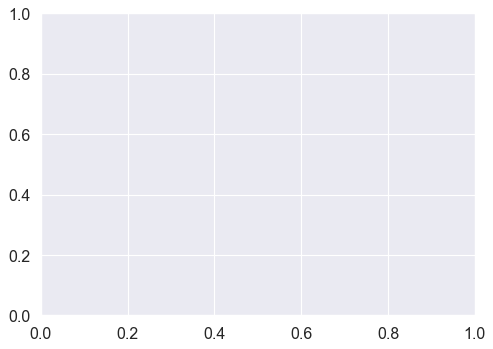

In [207]:
# adspy_shared_utilities import plot_feature_importances
# Atturibute Feature importances only use for classifiers contain trees

feature_names = ['mean_x', 'mean_y', 'mean_z', 
                'rms_x', 'rms_y', 'rms_z',
                'std_x', 'std_y', 'std_z',
                'med_x', 'med_y', 'med_z',
                'range_x','range_y','range_z',
                'max_x','max_y','max_z',
                'min_x','min_y','min_z',
                'skew_x','skew_y','skew_z',
                'kurtosis_x','kurtosis_y','kurtosis_z',
                'slope','averageLength',
                'meanAbs_x','meanAbs_y','meanAbs_z',
                'medianAbs_x','medianAbs_y','medianAbs_z',
                'stdAbs_x', 'stdAbs_y','stdAbs_z',
                'minAbs_x','minAbs_y','minAbs_z',
                'maxAbs_x','maxAbs_y','maxAbs_z',
                'skewAbs_x','skewAbs_y','skewAbs_z',
                'kurtosisAbs_x','kurtosisAbs_y','kurtosisAbs_z']
#                'meanTA','stdTA','skewTA','kurtosisTA']
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature Importances")
    plt.ylabel("Feature Name")
    plt.yticks(np.arange(c_features), feature_names)
    
plt.figure(figsize=(7,5), dpi=80)
plot_feature_importances(clf4, feature_names)
plt.show()

print('Feature importances: {}'.format(clf4.feature_importances_))

Confusion matrix, without normalization
[[13  0  0  0  0  4  7 13  8  2  0  0  0  0  0  0]
 [19 19  0  1  0  3  2  2  4  5  0  0  0  0  0  0]
 [ 0  0 29  0  0  1  0  4  1  2  0  0  0  0  0  6]
 [ 1  0  0 18  0  9  0  0  0  0  1  0  0  6  0  0]
 [ 0  0  0  0 23  5  0  0  0  0  0  2  1  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  3  1  1  0  6]
 [ 3  6  1  3  0  1 22 10  6  0  0  0  1  0  0  0]
 [ 2  4  1  0  0  2  2 30  3  1  0  0  0  0  0  0]
 [ 2  4  1  0  0  0  4 22 12  0  0  0  0  0  0  0]
 [ 0  3  1  4  0  0  0  0  2 26  0  0  0  1  0  0]
 [ 0  1  0 11  0  0  0  0  1  0 11  0  1  8  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0 25  0  1  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  7  0  4  0  0  0  1  4  0  1 16  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 18 19]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 30]]
Normalized confusion matrix
[[0.28 0.   0.   0.   0.   0.09 0.15 0.28 0.17 0.04 0.   0.   0.   0.
  0.   0.  ]
 [0.35 0.35 0.   0.02 0.   0.05 

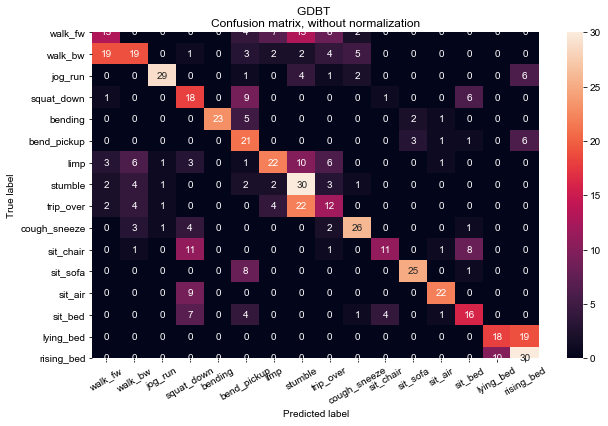

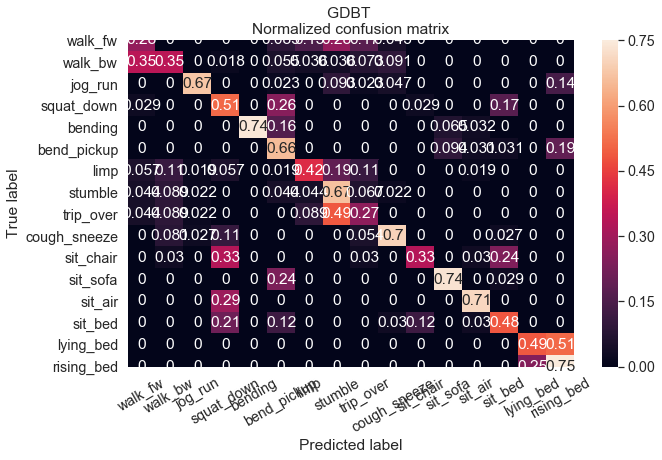


Classification Report: 
              precision    recall  f1-score   support

           0       0.33      0.28      0.30        47
           1       0.51      0.35      0.41        55
           2       0.88      0.67      0.76        43
           3       0.34      0.51      0.41        35
           4       1.00      0.74      0.85        31
           5       0.36      0.66      0.47        32
           6       0.59      0.42      0.49        53
           7       0.37      0.67      0.48        45
           8       0.32      0.27      0.29        45
           9       0.70      0.70      0.70        37
          10       0.69      0.33      0.45        33
          11       0.83      0.74      0.78        34
          12       0.81      0.71      0.76        31
          13       0.48      0.48      0.48        33
          14       0.64      0.49      0.55        37
          15       0.49      0.75      0.59        40

    accuracy                           0.53       631
 

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
from sklearn.utils.multiclass import unique_labels

target_names = ['walk_fw','walk_bw','jog_run','squat_down','bending',
                'bend_pickup','limp','stumble','trip_over','cough_sneeze',
                'sit_chair','sit_sofa','sit_air','sit_bed','lying_bed','rising_bed']

y_pred = clf4.predict(test_features)
lables = np.concatenate([target_names, ])

from sklearn.metrics import f1_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, title=None):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    #metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))
    
    fig, ax = plt.subplots(figsize = (10,6))
    #Create a 2-dim array include: rows, columns, data
    dataFrame = pd.DataFrame(cm)
    #create a heatmap, annot = True: add text on each cell over heatmap
    sb.heatmap(dataFrame, annot = True)  
    ax.set(xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

    sb.set(font_scale = 1.3)

np.set_printoptions(precision=2) #lam tron

plot_confusion_matrix(test_label, y_pred, classes=lables,  
        title='GDBT \nConfusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(test_label, y_pred, classes=lables, normalize=True,
        title='GDBT \nNormalized confusion matrix')

plt.show()
print ("\nClassification Report: ")
print (classification_report(test_label, y_pred,labels=np.unique(y_pred)))


In [ ]:
# t-SNE 

import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import graphviz 
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_labelled_scatter(X, y, class_labels): 
    num_labels = len(class_labels)
    print(num_labels)

    # create a mesh (lưới) to plot the boundaries (đường biên)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   
                    # X[row, column]
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    
    #16 colors
    colors = ['#fdb915', '#00AAFF', '#FF00AA','#10a674'] 
  
    cmap = ListedColormap(colors) 
    
   # Generate a colormap index based on discrete intervals
    norm = BoundaryNorm(numpy.arange(0, num_labels+1, 1), ncolors=num_labels) 
    
    plt.figure(figsize=(14, 10))
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cmap, norm=norm, alpha=0.45, lw=3)
                #edgecolor='black'
    
    # Create array h[] chứa chú thích behaviors & colors tương ứng
    h = []
    for c in range(0, num_labels):
        # tạo chú thích = mpatches.Patch
        h.append(mpatches.Patch(color=colors[c], label=class_labels[c])) 
    plt.legend(handles=h, fontsize = 'x-small') # show ghi chu
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('t-SNE data')

    plt.show()
    
X_visual = train_features
y_visual = np.array(train_label, dtype=np.uint8) 

n_samples = 300
n_components = 2  # dimension
perplexity = 30.0 # number of NEAREST NEIGHBORS that used in other MALIFOLD LEARNING algorithm (value: 5-50)
RS = 1000   

from sklearn.manifold import TSNE
# fit X_visual into embedding space in low-dimensional space and return  array (n_samples, n_components) 
X_tsne = TSNE(random_state=RS).fit_transform(X_visual)
#  , n_components=2, perplexity=30.0, learning_rate=300.0             
plot_labelled_scatter(X_tsne, y_visual,['walk_fw','walk_bw','jog_run','squat_down','bending',
                                        'bend_pickup','limp','stumble','trip_over','cough_sneeze',
                                        'sit_chair','sit_sofa','sit_air','sit_bed','lying_bed','rising_bed'])